# Audio EDA

#### Note: EDA is done on raw audio files without resampling and channel reduction which will be needed in training

In [37]:
import os
import pydub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa

In [2]:
DATA_FOLDER_PTH=os.path.join(os.getcwd(), os.pardir, 'data')

# processed
TRAIN_AUDIO_FOLDER_PTH=os.path.join(DATA_FOLDER_PTH, 'processed/MELD/train_wavs')
DEV_AUDIO_FOLDER_PTH=os.path.join(DATA_FOLDER_PTH, 'processed/MELD/dev_wavs')
TEST_AUDIO_FOLDER_PTH=os.path.join(DATA_FOLDER_PTH, 'processed/MELD/test_wavs')

In [12]:
if os.path.exists(os.path.join(os.getcwd(),os.pardir,'data/processed/MELD/train_wavs_stats.csv'))==False:
    audio_data=pd.DataFrame(columns=['sample_rate','channels','bits_pre_sample','duration','codec_long_name','size'])
    for audio_name in os.listdir(TRAIN_AUDIO_FOLDER_PTH):
        audio_pth=os.path.join(TRAIN_AUDIO_FOLDER_PTH,audio_name)
        info=pydub.utils.mediainfo(audio_pth)
        
        data={
            'audio_name':audio_name,
            'sample_rate':int(info['sample_rate']),
            'channels':int(info['channels']),
            'bits_pre_sample':int(info['bits_per_sample']),
            'duration': float(info['duration']),
            'codec_long_name':str(info['codec_long_name']),
            'size':int(info['size'])
        }
        
        audio_data=audio_data.append(data,ignore_index=True)
    audio_data.to_csv(os.path.join(os.getcwd(),os.pardir,'data/processed/MELD/train_wavs_stats.csv'),index=False)
else:
    audio_data=pd.read_csv(os.path.join(os.getcwd(),os.pardir,'data/processed/MELD/train_wavs_stats.csv'))

In [13]:
audio_data.head()

,sample_rate,channels,bits_pre_sample,duration,codec_long_name,size,audio_name
0,48000,2,16,5.674667,PCM signed 16-bit little-endian,1089614,dia0_utt0.wav
1,48000,2,16,1.472000,PCM signed 16-bit little-endian,282702,dia0_utt1.wav
2,48000,2,16,2.005333,PCM signed 16-bit little-endian,385102,dia0_utt10.wav
3,48000,2,16,8.320000,PCM signed 16-bit little-endian,1597518,dia0_utt11.wav
4,48000,2,16,3.050667,PCM signed 16-bit little-endian,585806,dia0_utt12.wav


In [14]:
audio_data.describe()

,sample_rate,channels,bits_pre_sample,duration,size
count,9988.0,9988.000000,9988.0,9988.000000,9.988000e+03
mean,48000.0,5.552663,16.0,3.142124,1.670729e+06
std,0.0,1.260713,0.0,2.428665,1.375472e+06
min,48000.0,2.000000,16.0,0.064000,1.236600e+04
25%,48000.0,6.000000,16.0,1.557333,7.742460e+05
50%,48000.0,6.000000,16.0,2.474667,1.278054e+06
75%,48000.0,6.000000,16.0,3.925333,2.113638e+06
max,48000.0,6.000000,16.0,41.045333,2.364221e+07


In [15]:
audio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9988 entries, 0 to 9987
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sample_rate      9988 non-null   int64  
 1   channels         9988 non-null   int64  
 2   bits_pre_sample  9988 non-null   int64  
 3   duration         9988 non-null   float64
 4   codec_long_name  9988 non-null   object 
 5   size             9988 non-null   int64  
 6   audio_name       9988 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 546.3+ KB


In [16]:
audio_data.nunique()

sample_rate           1
channels              2
bits_pre_sample       1
duration            466
codec_long_name       1
size                765
audio_name         9988
dtype: int64

#### Note: Not everything is 2 channel audio

## Inspect channels

In [19]:
audio_data.channels.unique()

array([2, 6], dtype=int64)

In [24]:
print(len(audio_data[audio_data.channels==6]))
print(len(audio_data[audio_data.channels==2]))
# Comment: most is 6 channel actually

8871
1117


## Inspect duration distribution

<AxesSubplot:xlabel='duration', ylabel='Count'>

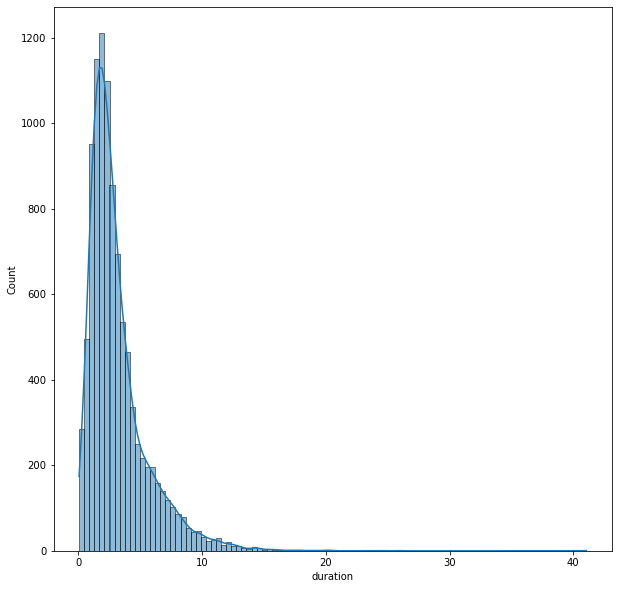

In [41]:
fig,ax=plt.subplots(figsize=(10,10))
sns.histplot(ax=ax, data=audio_data.duration, kde=True, bins=100)